# Delivery Time Prediction

i) Data Profiling

ii) Data Cleaning

iii) Missing-Value Treatment

iv) Exploratory Data Analysis

v) Feature Engineering = encoding , binning, combine correlated feat

vi) Data Preprocessing = split , scale , encode , pca dim reduce

vii) Modeling


In [508]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import timeit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings("default", category=DataConversionWarning)

In [509]:
df = pd.read_csv("filEs/train.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# i) Data Profiling


In [510]:
df.shape

(45593, 20)

In [511]:
df.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
31977,0xd9a2,LUDHRES14DEL01,24,4.9,30.892978,75.821847,31.002978,75.931847,12-02-2022,18:15:00,18:30:00,conditions Sunny,Medium,1,Buffet,scooter,NaN,No,Metropolitian,(min) 19
27313,0x4c27,SURRES010DEL01,23,4.6,21.171060,72.789292,21.281060,72.899292,02-04-2022,20:50:00,21:00:00,conditions Fog,Jam,1,Drinks,motorcycle,1,No,Metropolitian,(min) 38
5024,0xde58,KNPRES09DEL02,35,4.6,26.473698,80.352677,26.553698,80.432677,12-02-2022,17:30:00,17:40:00,conditions Stormy,Medium,0,Buffet,motorcycle,0,No,Metropolitian,(min) 41
4950,0x44b,BANGRES18DEL02,NaN,NaN,12.913041,77.683237,13.043041,77.813237,31-03-2022,NaN,23:10:00,conditions NaN,NaN,3,Buffet,electric_scooter,1,No,NaN,(min) 28
21525,0x4d31,RANCHIRES01DEL01,22,4.6,23.416792,85.316842,23.526792,85.426842,06-03-2022,17:35:00,17:50:00,conditions Windy,Medium,0,Meal,motorcycle,1,No,Metropolitian,(min) 25
35328,0x7e03,INDORES010DEL03,20,5,22.750040,75.902847,22.780040,75.932847,15-03-2022,17:25:00,17:35:00,conditions Cloudy,Medium,1,Meal,scooter,1,No,Metropolitian,(min) 17
22152,0x7f2f,CHENRES18DEL03,25,4.6,12.981615,80.231598,13.041615,80.291598,15-03-2022,20:15:00,20:30:00,conditions Stormy,Jam,1,Meal,scooter,0,No,Metropolitian,(min) 13
24528,0xfdc,COIMBRES19DEL01,21,4.8,11.022298,76.998349,11.062298,77.038349,05-04-2022,15:15:00,15:30:00,conditions Sandstorms,Medium,1,Drinks,motorcycle,1,No,Urban,(min) 25
26139,0x6da9,JAPRES09DEL02,25,4.5,26.911378,75.789034,26.991378,75.869034,04-03-2022,18:20:00,18:35:00,conditions Fog,Medium,2,Meal,scooter,1,No,Metropolitian,(min) 29
25115,0xa684,MYSRES19DEL01,26,4.7,12.334022,76.618203,12.404022,76.688203,02-03-2022,18:10:00,18:20:00,conditions Stormy,Medium,0,Meal,motorcycle,1,No,Metropolitian,(min) 36


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [513]:
df.isna().sum().sum()

0

In [514]:
df.iloc[6478, 2]

'NaN '

In [515]:
(df == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

#### Data are missing and in the form of object "NaN " , so requires treatment


In [516]:
(df == "NaN ").sum().sum()

8515

In [517]:
missing_df = df.replace(["NaN ", "conditions NaN"], np.NaN)
# "NaN " is in string form and weather contains conditions NaN

In [518]:
missing_df["Weatherconditions"] = missing_df.loc[:, "Weatherconditions"].str.replace(
    "conditions ", ""
)  # weather contains condition .....weather....

In [519]:
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [520]:
(missing_df == "NaN ").sum().sum()

0

In [521]:
missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [522]:
missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [523]:
missing_df.isna().sum().sum()

9131

In [524]:
missing_df.Weatherconditions.unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

<Axes: >

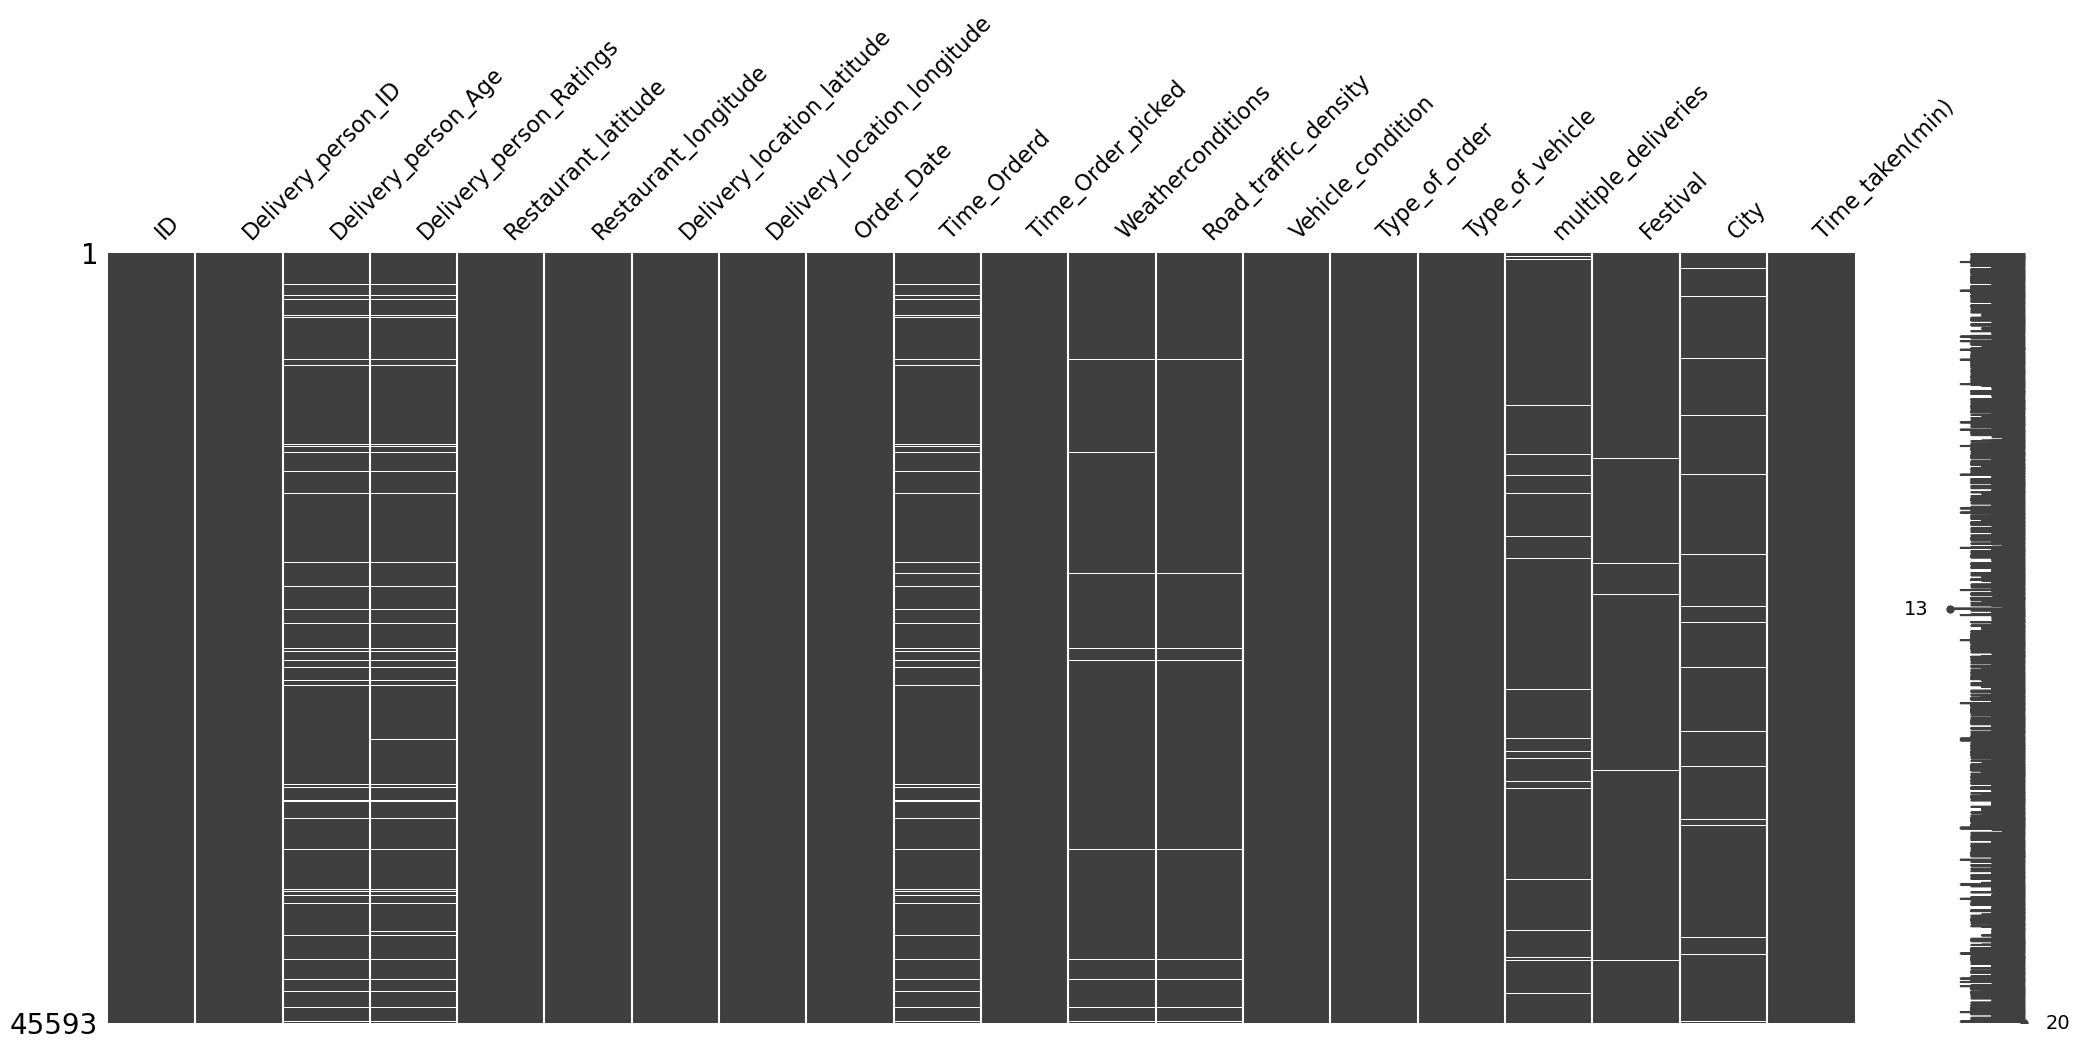

In [525]:
msno.matrix(missing_df)

<Axes: >

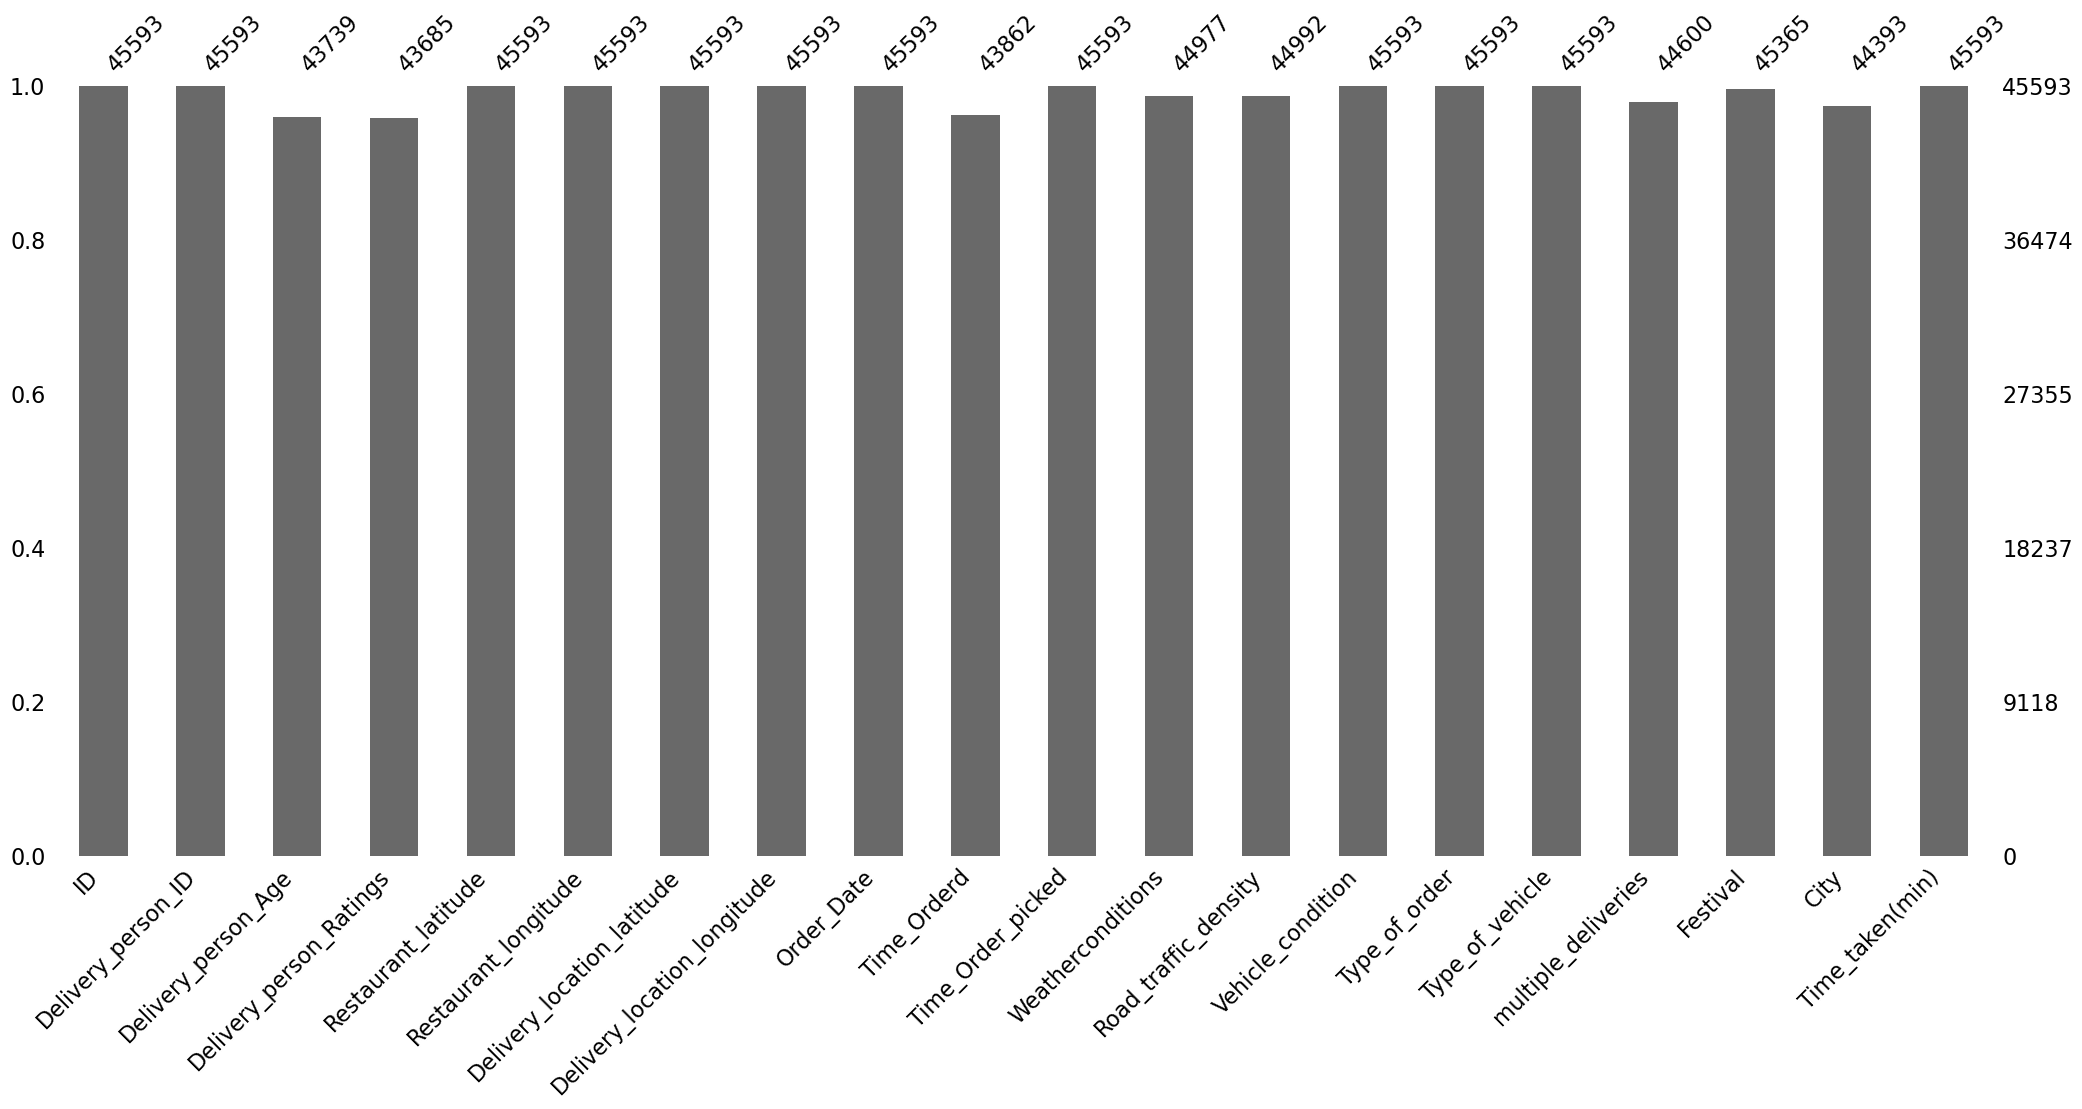

In [526]:
msno.bar(missing_df)

<Axes: >

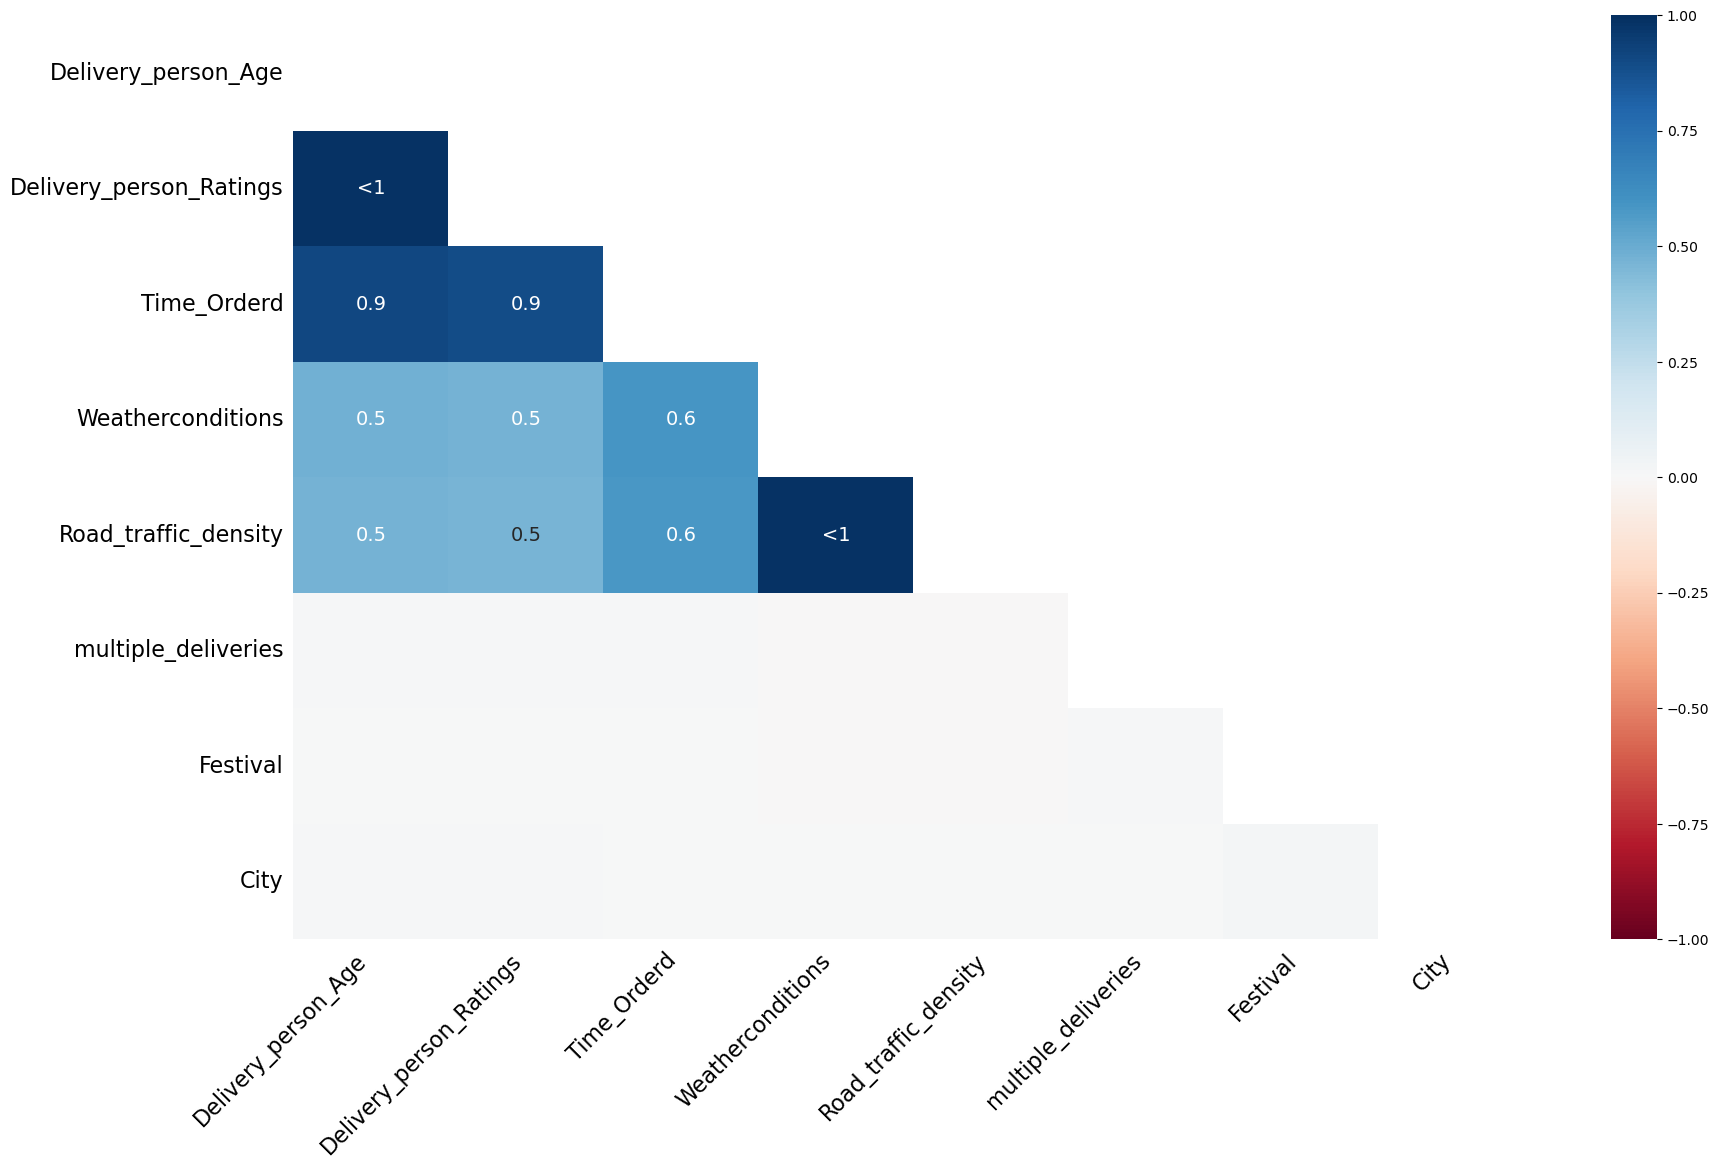

In [527]:
msno.heatmap(missing_df)

- weather condition and road traffic density seems to be related , as traffic is affected by weather and office time
- time order is also related to delivery persons rating delivery and delivery person age may be due to network issue data were just filled with nan


In [528]:
missing_df.Road_traffic_density.isna().sum()

601

In [529]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().all(
    axis=1
).sum() / missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

In [530]:
missing_df[["Weatherconditions", "Road_traffic_density"]].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

<Axes: >

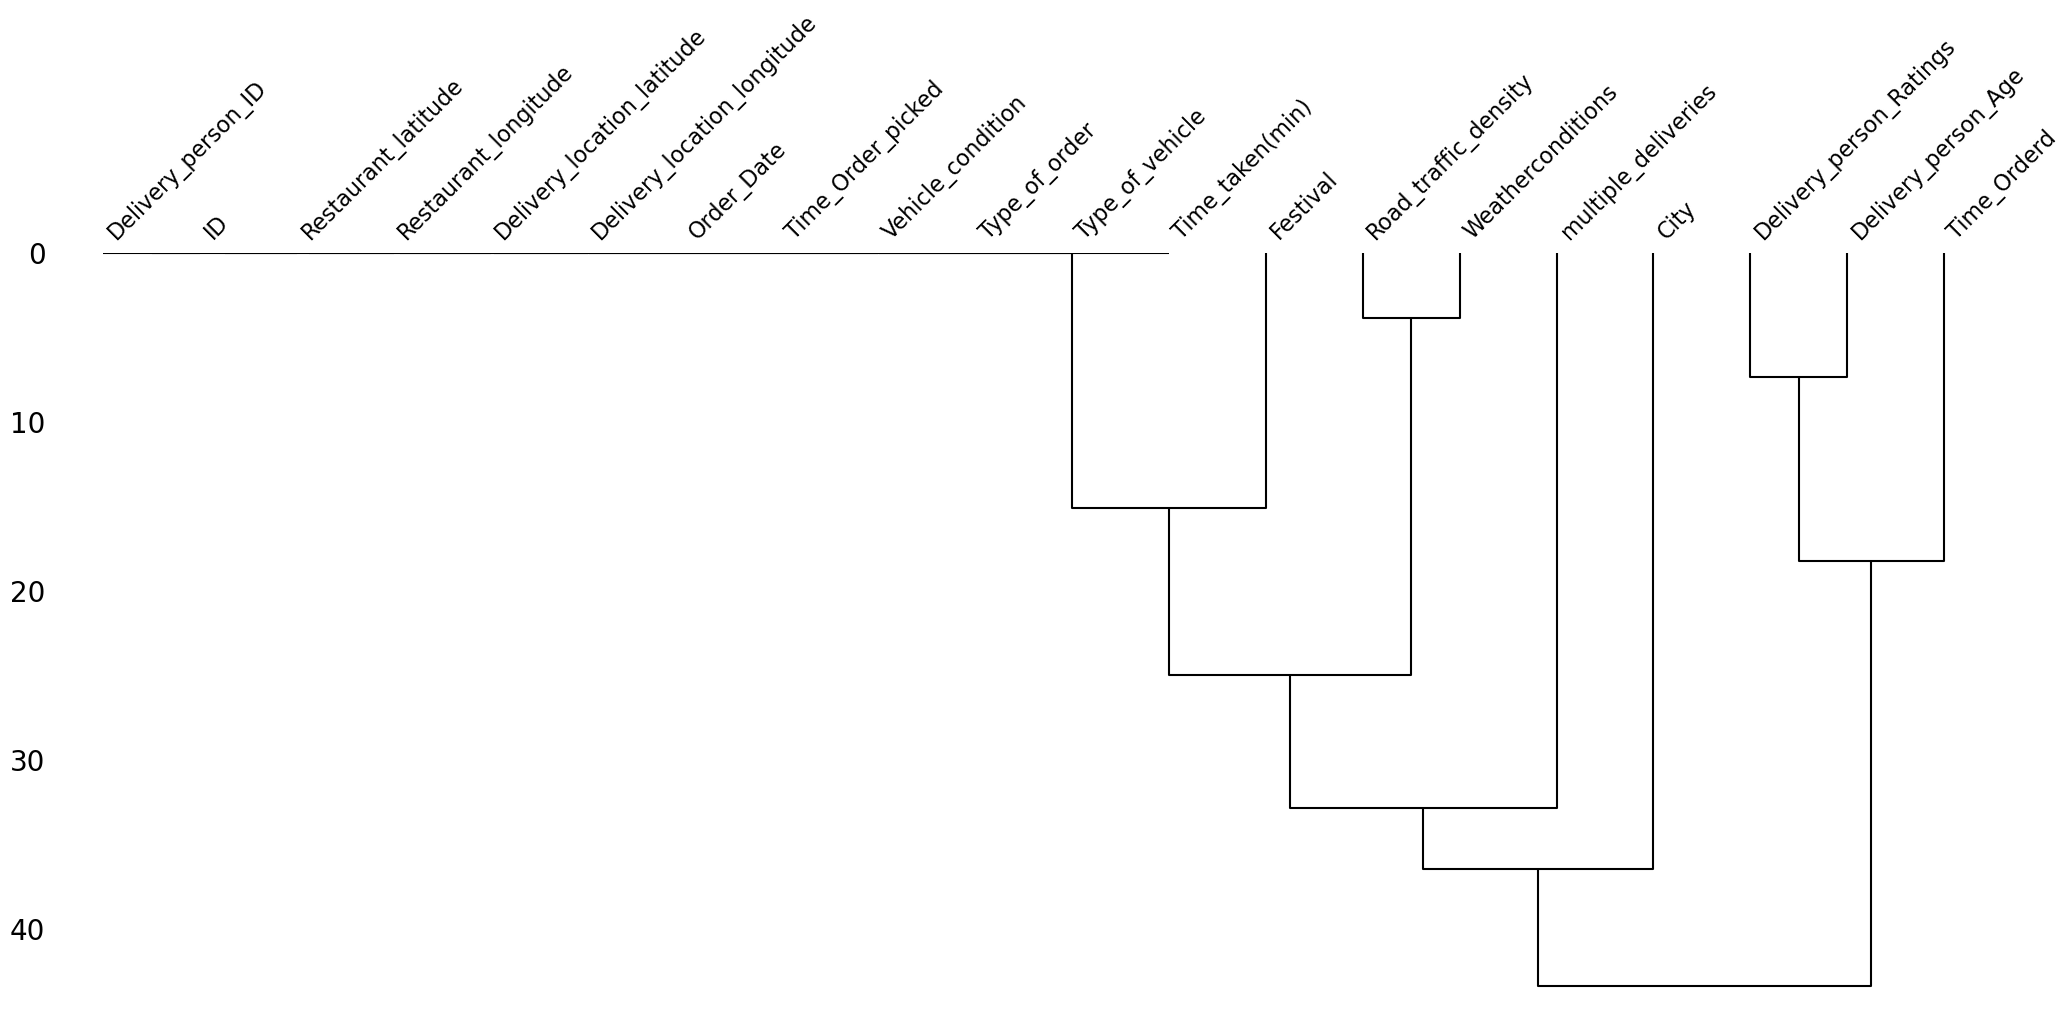

In [531]:
msno.dendrogram(missing_df)

- #### these features seems to be missing not at random , missing at one feature is related to missingness in other
- to be careful during imputation


In [532]:
# total missing percentage
(missing_df.isna().any(axis=1).sum() / missing_df.shape[0]) * 100

9.266773408198627

rows with at least a null value


# Data Cleaning


In [533]:
df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

### i) rider info-rating

In [534]:
def change_column_name(data: pd.DataFrame):
    return data.rename(
        # return data.rename(str.lower, axis=1).rename(
        {
            "Delivery_person_ID": "rider_id",
            "Delivery_person_Age": "rider_age",
            "Delivery_person_Ratings": "rider_rating",
            "Weatherconditions": "weather",
            "Road_traffic_density": "road_traffic",
        },
        axis=1,
    )

In [535]:
missing_df = change_column_name(missing_df)

In [536]:
missing_df.head()

,ID,rider_id,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [537]:
missing_df[["rider_id", "ID"]].duplicated().sum()  # duplicated rows

0

In [538]:
cleaned_df = missing_df.drop(columns="ID")
cleaned_df.sample()

,rider_id,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
12225,MUMRES03DEL01,30,4.6,19.22384,72.841347,19.26384,72.881347,15-03-2022,16:35:00,16:45:00,Cloudy,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 26


In [539]:
cleaned_df.rider_id = cleaned_df["rider_id"].str.split("RES").str.get(0)
cleaned_df.rename(columns={"rider_id": "city_name"}, inplace=True)

In [540]:
cleaned_df.sample()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
17119,PUNE,34,4.8,18.593481,73.785901,18.633481,73.825901,13-03-2022,12:35:00,12:50:00,Sandstorms,High,2,Buffet,electric_scooter,1,No,Metropolitian,(min) 28


In [541]:
cleaned_df.rider_age.unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', nan, '28', '39', '30', '15',
       '50'], dtype=object)

In [542]:
minor_data = cleaned_df[cleaned_df["rider_age"].astype(float) < 18]
minor_index = minor_data.index.to_list()


cleaned_df["rider_age"] = cleaned_df["rider_age"].astype(float)

In [543]:
cleaned_df.rider_age.describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: rider_age, dtype: float64

min 15 years is suspicious


<Axes: ylabel='rider_age'>

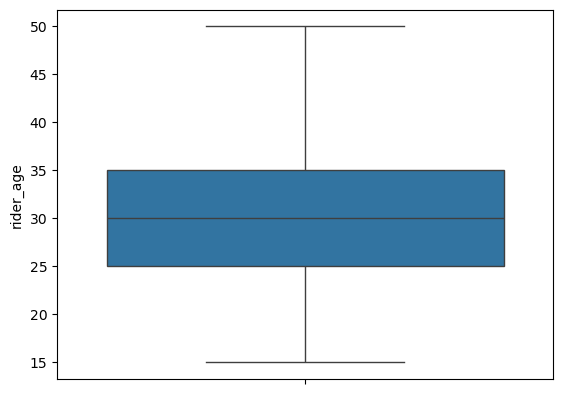

In [544]:
sns.boxplot(cleaned_df["rider_age"])

In [545]:
cleaned_df[cleaned_df["rider_age"] < 18]

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
2387,JAP,15.0,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,INDO,15.0,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,SUR,15.0,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,CHEN,15.0,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,BANG,15.0,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,MUM,15.0,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,SUR,15.0,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,INDO,15.0,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,RANCHI,15.0,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,CHEN,15.0,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [546]:
cleaned_df[cleaned_df["rider_age"] < 18].shape

(38, 19)

- all the row below age 18 are filled with age 15 and contains all nans in time ordered ,weather and road_traffic and vehicle condition is rated with worse
- contains 38 rows so good to drop


In [547]:
cleaned_df = cleaned_df[cleaned_df["rider_age"] >= 18]
cleaned_df.sample()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
22732,MUM,31.0,4,19.221315,72.862381,19.281315,72.922381,03-03-2022,19:10:00,19:20:00,Sandstorms,Jam,1,Drinks,motorcycle,0,No,Metropolitian,(min) 33


In [548]:
cleaned_df["rider_rating"] = cleaned_df["rider_rating"].astype(float)
cleaned_df["rider_rating"].describe()

count    43647.000000
mean         4.636944
std          0.317217
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: rider_rating, dtype: float64

<Axes: ylabel='rider_rating'>

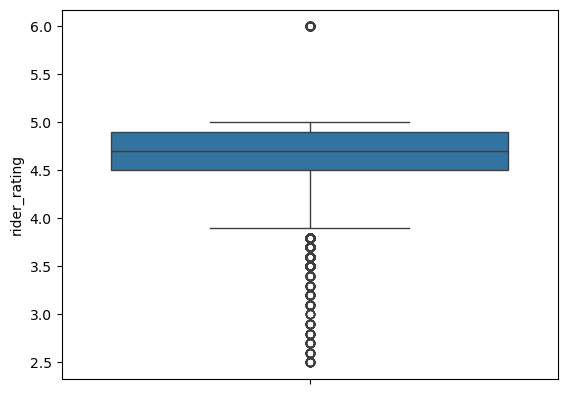

In [549]:
sns.boxplot(cleaned_df["rider_rating"])

In [550]:
cleaned_df[cleaned_df["rider_rating"] > 5]
six_star_data = cleaned_df[cleaned_df["rider_rating"] > 5]
six_star_data_index = six_star_data.index.tolist()

In [551]:
cleaned_df.head()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,weather,road_traffic,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


### ii) Location 

In [552]:
location_sub = cleaned_df.iloc[:, 3:7]
location_sub.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


this country lies between 6° 44'and 35°30' north latitude and 68°7' and 97° 25'eastlongitude

Latitude: 6°44′N to 35°30′N

Longitude: 68°7′E to 97°25′E


In [553]:
location_sub.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,43701.000000,43701.000000,43701.000000,43701.000000
mean,17.220955,70.685926,17.461092,70.821604
std,7.747106,21.392773,7.343421,21.153298
min,-30.902872,-88.366217,0.010000,0.010000
25%,12.933298,73.170283,12.985996,73.280000
50%,18.551440,75.898497,18.633934,76.002471
75%,22.732225,78.045359,22.785207,78.104095
max,30.914057,88.433452,31.054057,88.563452


In [554]:
# no problem in maximum there is problem in min values
lower_lat = 6.44
lower_long = 68.7

In [555]:
location_sub.loc[
    (location_sub["Restaurant_latitude"] < lower_lat)
    | (location_sub["Delivery_location_latitude"] < lower_lat)
    | (location_sub["Restaurant_longitude"] < lower_long)
    | (location_sub["Delivery_location_longitude"] < lower_long)
].sample(20)

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
11707,0.0,0.0,0.03,0.03
43116,0.0,0.0,0.05,0.05
32820,0.0,0.0,0.02,0.02
14576,0.0,0.0,0.09,0.09
7907,0.0,0.0,0.05,0.05
7429,0.0,0.0,0.11,0.11
42463,0.0,0.0,0.03,0.03
34335,0.0,0.0,0.11,0.11
32225,0.0,0.0,0.03,0.03
16153,0.0,0.0,0.09,0.09


In [556]:
location_sub.loc[
    (location_sub["Restaurant_latitude"] < lower_lat)
    | (location_sub["Delivery_location_latitude"] < lower_lat)
    | (location_sub["Restaurant_longitude"] < lower_long)
    | (location_sub["Delivery_location_longitude"] < lower_long)
].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,3680.000000,3680.000000,3680.000000,3680.000000
mean,-1.048247,2.962769,1.111318,3.881862
std,4.845664,17.142567,4.845626,16.972171
min,-30.902872,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.030000,0.030000
50%,0.000000,0.000000,0.060000,0.060000
75%,0.000000,0.000000,0.090000,0.090000
max,0.000000,88.433452,31.012872,88.523452


##### problem in max is present in Restaurant_latitude

this country lies between 6° 44'and 35°30' north latitude and 68°7' and 97° 25'eastlongitude


<Axes: >

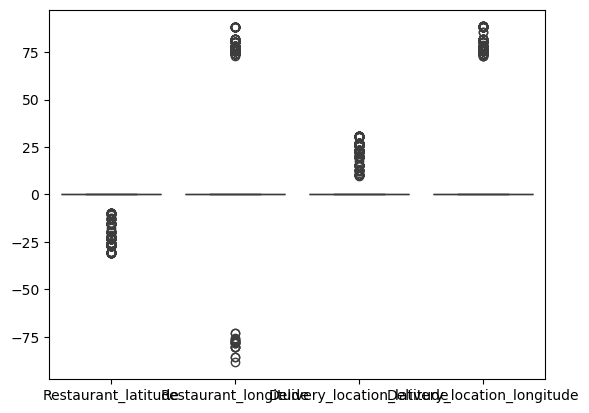

In [557]:
sns.boxplot(
    location_sub.loc[
        (location_sub["Restaurant_latitude"] < lower_lat)
        | (location_sub["Delivery_location_latitude"] < lower_lat)
        | (location_sub["Restaurant_longitude"] < lower_long)
        | (location_sub["Delivery_location_longitude"] < lower_long)
    ]
)

#### ! we can take absolute for negative latitude and and cant easily fill zero value latitude and can be filled with nan then fill with advanced imputation with multivariant analysis


(array([1, 2, 3, 4]),
 [Text(1, 0, 'Restaurant_latitude'),
  Text(2, 0, 'Restaurant_longitude'),
  Text(3, 0, 'Delivery_location_latitude'),
  Text(4, 0, 'Delivery_location_longitude')])

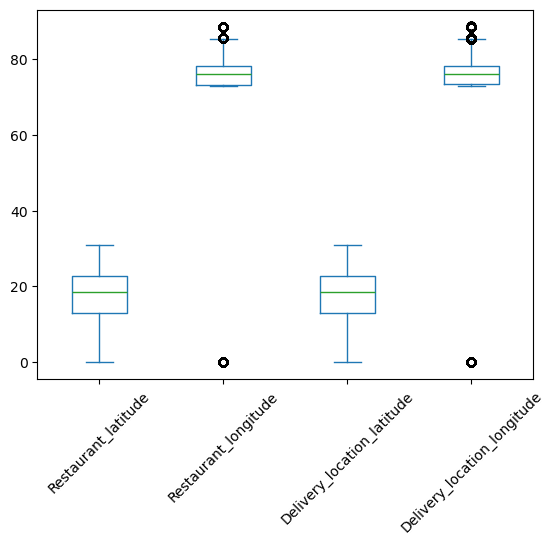

In [558]:
location_sub.abs().plot(kind="box")
plt.xticks(rotation=45)

In [559]:
location_sub.abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < lower_lat)
    | (absdf["Delivery_location_latitude"] < lower_lat)
    | (absdf["Restaurant_longitude"] < lower_long)
    | (absdf["Delivery_location_longitude"] < lower_long)
].shape

(3502, 4)

In [560]:
location_sub.abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(3502, 4)

### all values are less then 1

In [561]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_cols = location_sub.columns.tolist()
    return data.assign(
        **{
            col: (np.where(data[col] < threshold, np.nan, data[col].values))
            for col in location_cols
        }
    )


In [562]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < lower_lat)
    | (absdf["Delivery_location_latitude"] < lower_lat)
    | (absdf["Restaurant_longitude"] < lower_long)
    | (absdf["Delivery_location_longitude"] < lower_long)
].shape

(3502, 4)

In [563]:
cleaned_df[location_sub.columns].shape

(43701, 4)

In [564]:
cleaned_df[location_sub.columns]=cleaned_df[location_sub.columns].abs()

In [565]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,43701.000000,43701.000000,43701.000000,43701.000000
mean,17.397498,70.758011,17.461092,70.821604
std,7.342062,21.153122,7.343421,21.153298
min,0.000000,0.000000,0.010000,0.010000
25%,12.934179,73.170283,12.985996,73.280000
50%,18.554382,75.898497,18.633934,76.002471
75%,22.732225,78.045359,22.785207,78.104095
max,30.914057,88.433452,31.054057,88.563452


In [566]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,43701.000000,43701.000000,43701.000000,43701.000000
mean,17.397498,70.758011,17.461092,70.821604
std,7.342062,21.153122,7.343421,21.153298
min,0.000000,0.000000,0.010000,0.010000
25%,12.934179,73.170283,12.985996,73.280000
50%,18.554382,75.898497,18.633934,76.002471
75%,22.732225,78.045359,22.785207,78.104095
max,30.914057,88.433452,31.054057,88.563452


In [567]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(3502, 4)

In [568]:
cleaned_df=clean_lat_long(cleaned_df)

In [569]:
cleaned_df[location_sub.columns].abs().loc[
    lambda absdf: (absdf["Restaurant_latitude"] < 1)
    | (absdf["Delivery_location_latitude"] < 1)
    | (absdf["Restaurant_longitude"] < 1)
    | (absdf["Delivery_location_longitude"] < 1)
].shape

(0, 4)

In [570]:
cleaned_df[location_sub.columns].describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,40199.000000,40199.000000,40199.000000,40199.000000
mean,18.913109,76.922208,18.976744,76.985843
std,5.471422,3.501548,5.473250,3.501770
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.898520,13.065801,73.940547
50%,19.065838,76.618203,19.124049,76.663067
75%,22.751234,78.368855,22.820072,78.403391
max,30.914057,88.433452,31.054057,88.563452


#### helps in dvc pipelining

def data_cleaning(data: pd.DataFrame):
data


### iii) ordered date - Date-Time

In [571]:
cleaned_df["Order_Date"].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '04-04-2022', '24-03-2022',
       '09-03-2022', '02-03-2022', '13-03-2022', '29-03-2022',
       '31-03-2022', '17-03-2022', '07-03-2022', '15-03-2022',
       '16-02-2022', '03-03-2022', '18-02-2022', '23-03-2022',
       '17-02-2022', '06-03-2022', '21-03-2022', '06-04-2022'],
      dtype=object)

In [572]:
cleaned_df.Order_Date.isna().sum()

0

In [573]:
cleaned_df["Order_Date"]=pd.to_datetime(cleaned_df["Order_Date"],dayfirst=True)
cleaned_df["Order_Date"].max()-cleaned_df["Order_Date"].min()

Timedelta('54 days 00:00:00')

In [574]:
cleaned_df["Order_Date"].min(),"/n",cleaned_df["Order_Date"].max()

(Timestamp('2022-02-11 00:00:00'), '/n', Timestamp('2022-04-06 00:00:00'))

In [575]:
def extract_date_time(ser:pd.Series):
    date_col=pd.to_datetime(ser,dayfirst=True)
    return(
        pd.DataFrame({
            "Day":date_col.dt.day,
            "month":date_col.dt.month,
            "year":date_col.dt.year,
            "day_of_week":date_col.dt.day_name(),
            "Weekend":date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
        })
    )

In [576]:
dates=extract_date_time(cleaned_df["Order_Date"])
dates.head()

,Day,month,year,day_of_week,Weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1


In [577]:
# cleaned_df=return_date_time(cleaned_df["Order_Date"])
cleaned_df = pd.concat([cleaned_df, extract_date_time(cleaned_df["Order_Date"])], axis=1)


In [578]:
cleaned_df.drop(columns="Order_Date").head()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,weather,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,month,year,day_of_week,Weekend
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,...,motorcycle,0,No,Urban,(min) 24,19,3,2022,Saturday,1
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,...,scooter,1,No,Metropolitian,(min) 33,25,3,2022,Friday,0
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,...,motorcycle,1,No,Urban,(min) 26,19,3,2022,Saturday,1
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,...,motorcycle,1,No,Metropolitian,(min) 21,5,4,2022,Tuesday,0
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,...,scooter,1,No,Metropolitian,(min) 30,26,3,2022,Saturday,1


#### Time 

In [ ]:
# cleaned_df["Time_Orderd"]=pd.to_datetime(cleaned_df["Time_Orderd"],format="mixed").dt.time
# cleaned_df["Time_Order_picked"]=pd.to_datetime(cleaned_df["Time_Order_picked"],format="mixed").dt.time
# cleaned_df["ordered_time"]=pd.to_datetime(cleaned_df["Time_Orderd"],format="mixed").dt.hour
# cleaned_df["picked_time"]=pd.to_datetime(cleaned_df["Time_Order_picked"],format="mixed").dt.hour

In [579]:
cleaned_df.drop(columns="year",inplace=True)

In [580]:
def extract_time_of_the_day(ser: pd.Series):
    ser = pd.to_datetime(ser).dt.hour
    return np.select(
        condlist=[
            (ser.between(6, 12, inclusive="left")),
            (ser.between(12, 17, inclusive="left")),
            (ser.between(17, 20, inclusive="left")),
            (ser.between(20, 24, inclusive="left")),
        ],
        choicelist=["morning", "afternoon", "evening", "night"],
        default="after_midnight",
    )

In [581]:
# cleaned_df=pd.concat([cleaned_df,extract_time_of_the_day(cleaned_df["Time_Orderd"])])


In [583]:
time_subset=cleaned_df.loc[:,["Time_Orderd","Time_Order_picked"]]
time_subset

,Time_Orderd,Time_Order_picked
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [585]:
(time_subset.dtypes)

Time_Orderd          object
Time_Order_picked    object
dtype: object

In [602]:
filtered_time=(
    time_subset.assign(
        **{
            col: pd.to_datetime(
                time_subset[col].replace("NaN", np.NaN), format="mixed")
            for col in time_subset.columns.tolist()
        }
    ).assign(
        pickup_time=lambda x: (
            x["Time_Order_picked"] - x["Time_Orderd"]
        ).dt.total_seconds()
        / 60,
        Time_Orderd_hour=lambda x: x["Time_Orderd"].dt.hour,
        Time_Orderd_of_day=lambda x: extract_time_of_the_day(x["Time_Orderd"])
    )
    .drop(columns=["Time_Orderd", "Time_Order_picked"])
)
filtered_time

,pickup_time,Time_Orderd_hour,Time_Orderd_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,-1425.0,23.0,night
45591,5.0,13.0,afternoon


In [603]:
cleaned_df = pd.concat([cleaned_df, filtered_time], axis=1)

In [605]:
cleaned_df.head()

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken(min),Day,month,day_of_week,Weekend,pickup_time,Time_Orderd_hour,Time_Orderd_of_day
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,No,Urban,(min) 24,19,3,Saturday,1,15.0,11.0,morning
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,No,Metropolitian,(min) 33,25,3,Friday,0,5.0,19.0,evening
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,No,Urban,(min) 26,19,3,Saturday,1,15.0,8.0,morning
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,No,Metropolitian,(min) 21,5,4,Tuesday,0,10.0,18.0,evening
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,No,Metropolitian,(min) 30,26,3,Saturday,1,15.0,13.0,afternoon


In [609]:
cleaned_df.rename({"pickup_time":"pick_time_minutes"},axis=1)

,city_name,rider_age,rider_rating,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken(min),Day,month,day_of_week,Weekend,pick_time_minutes,Time_Orderd_hour,Time_Orderd_of_day
0,INDO,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,No,Urban,(min) 24,19,3,Saturday,1,15.0,11.0,morning
1,BANG,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,No,Metropolitian,(min) 33,25,3,Friday,0,5.0,19.0,evening
2,BANG,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,No,Urban,(min) 26,19,3,Saturday,1,15.0,8.0,morning
3,COIMB,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,No,Metropolitian,(min) 21,5,4,Tuesday,0,10.0,18.0,evening
4,CHEN,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,No,Metropolitian,(min) 30,26,3,Saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAP,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,...,No,Metropolitian,(min) 32,24,3,Thursday,0,10.0,11.0,morning
45589,AGR,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,19:55:00,20:10:00,...,No,Metropolitian,(min) 36,16,2,Wednesday,0,15.0,19.0,evening
45590,CHEN,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,...,No,Metropolitian,(min) 16,11,3,Friday,0,-1425.0,23.0,night
45591,COIMB,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,...,No,Metropolitian,(min) 26,7,3,Monday,0,5.0,13.0,afternoon
